In [15]:
import numpy as np
import pandas as pd
from scipy.signal import find_peaks
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')
fake_ids = np.load('../data/synthetic_samples_indexes.npy')

In [3]:
good_test = test.loc[~test.index.isin(fake_ids)]
all_data = pd.concat([train[train.columns[2:]], good_test[test.columns[1:]]])

In [9]:
def count_dist_peaks(series, bins, prominence, width):
    count, division = np.histogram(series, bins=bins)
    peaks, props = find_peaks(count, prominence=prominence, width=width)
    return peaks

In [10]:
var_names = train.columns[2:]
peak_dic = {col:count_dist_peaks(
    all_data[col].values, bins=100,
    prominence=700, width=[0,10]) for col in var_names}
non_empty_peaks = {k:v for k,v in peak_dic.items() if len(v) > 0}

In [24]:
0 if var_count % cols == 0 else 1

1

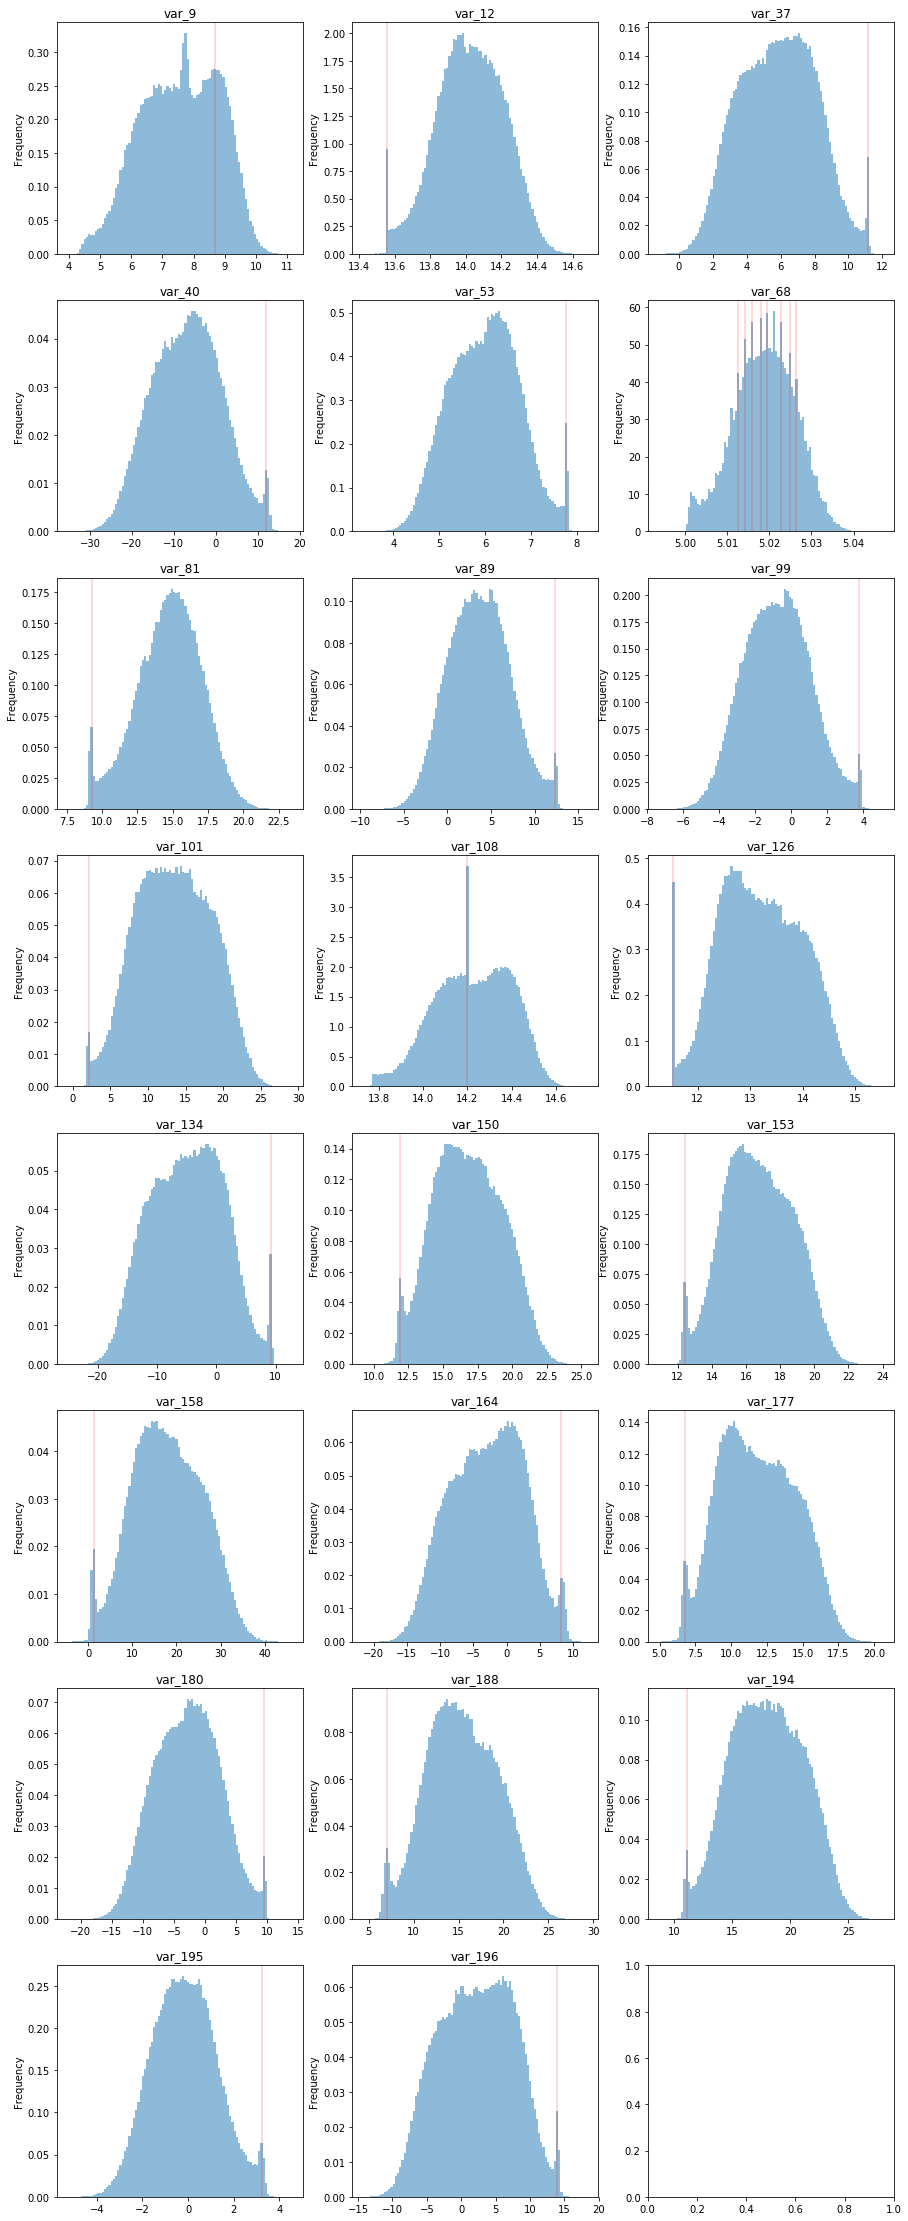

In [26]:
var_count = len(non_empty_peaks)
cols      = 3
rows      = var_count // cols
rows      = rows if var_count % cols == 0 else rows + 1

f, axes = plt.subplots(rows, cols, figsize=(5 * cols, 5 * rows))

for i, (k, v) in enumerate(non_empty_peaks.items()):
    count, division = np.histogram(all_data[k].values, bins=100)
    ax = axes[i//3, i % 3]
    all_data[k].plot.hist(bins=100, alpha=0.5, density=True, title=k, ax=ax)
    for p in v:
        ax.axvline(x=(division[p] + division[p + 1]) / 2, c='red',alpha=0.2)